In [8]:
import numpy as np
import pandas as pd
import matplotlib.ticker as mtick 
import matplotlib.pyplot as plt


In [12]:
telecom_cust = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [13]:
print(telecom_cust.head())

   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract Pape

In [14]:
telecom_cust.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

In [15]:
telecom_cust.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [16]:
telecom_cust.TotalCharges = pd.to_numeric(telecom_cust.TotalCharges, errors='coerce')
telecom_cust.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

##### After looking at the above output, we can say that there are 11 missing values for Total Charges. Let us replace remove these 11 rows from our data set

In [18]:
#Removing missing values 
telecom_cust.dropna(inplace = True)
#Remove customer IDs from the data set
df2 = telecom_cust.iloc[:,1:]
#Converting the predictor variable in a binary numeric variable
df2['Churn'].replace(to_replace='Yes', value=1, inplace=True)
df2['Churn'].replace(to_replace='No',  value=0, inplace=True)

#Let's convert all the categorical variables into dummy variables
df_dummies = pd.get_dummies(df2)
df_dummies.head() 

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,0,True,False,False,True,True,...,False,True,False,False,False,True,False,False,True,False
1,0,34,56.95,1889.50,0,False,True,True,False,True,...,False,False,True,False,True,False,False,False,False,True
2,0,2,53.85,108.15,1,False,True,True,False,True,...,False,True,False,False,False,True,False,False,False,True
3,0,45,42.30,1840.75,0,False,True,True,False,True,...,False,False,True,False,True,False,True,False,False,False
4,0,2,70.70,151.65,1,True,False,True,False,True,...,False,True,False,False,False,True,False,False,True,False


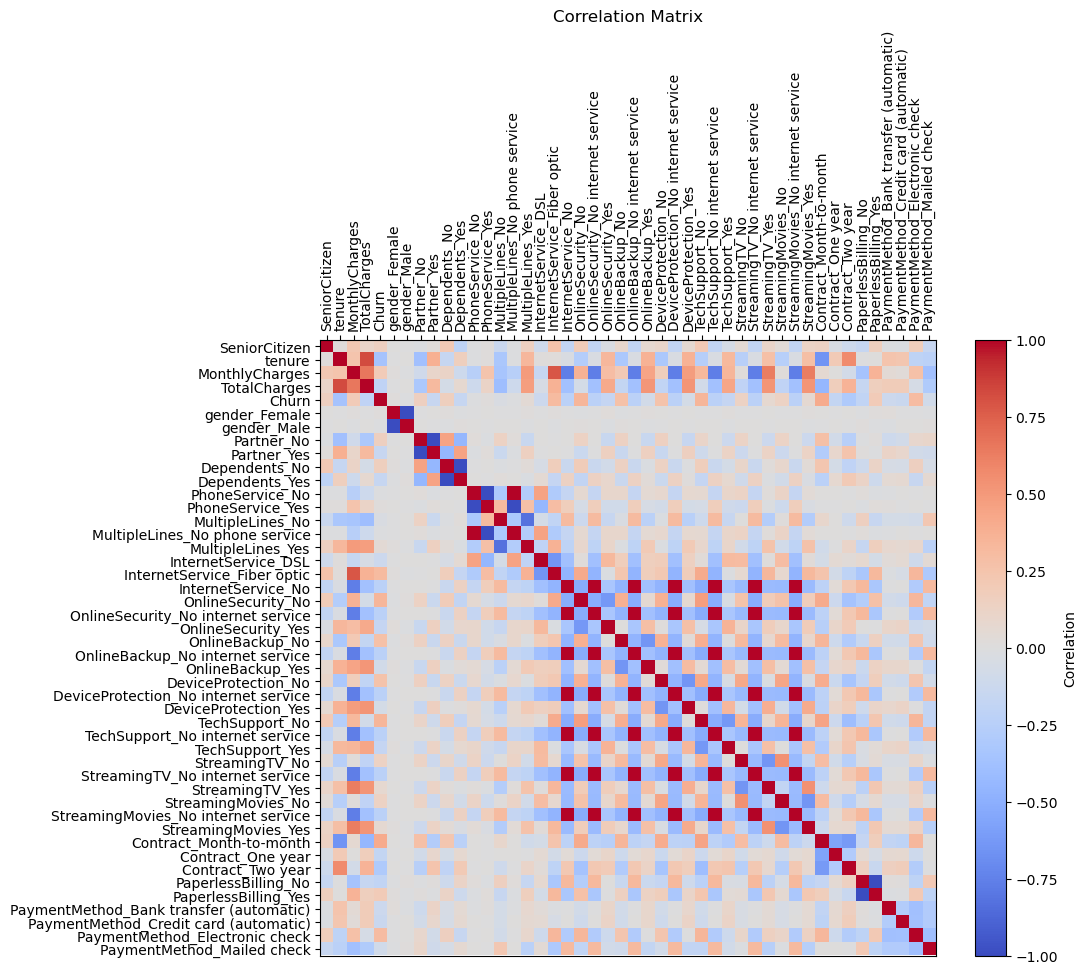

In [81]:
import matplotlib.pyplot as plt
import numpy as np  # for creating a dummy correlation matrix

# Assuming df_dummies is your DataFrame and 'Churn' is included in it
# Compute correlation matrix
corr_matrix = df_dummies.corr()

# Get number of variables
num_vars = corr_matrix.shape[0]

# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 8))

# Create a heatmap
cax = ax.imshow(corr_matrix, cmap='coolwarm', vmin=-1, vmax=1)

# Set tick labels and center them
ax.set_xticks(np.arange(num_vars))
ax.set_yticks(np.arange(num_vars))
ax.set_xticklabels(corr_matrix.columns)
ax.set_yticklabels(corr_matrix.columns)
ax.xaxis.tick_top()

# Rotate x labels and set their alignment
plt.xticks(rotation=90, ha='center')

# Add color bar
cbar = fig.colorbar(cax)
cbar.set_label('Correlation')

# Set title
plt.title('Correlation Matrix')

# Show plot
plt.show()

<Axes: >

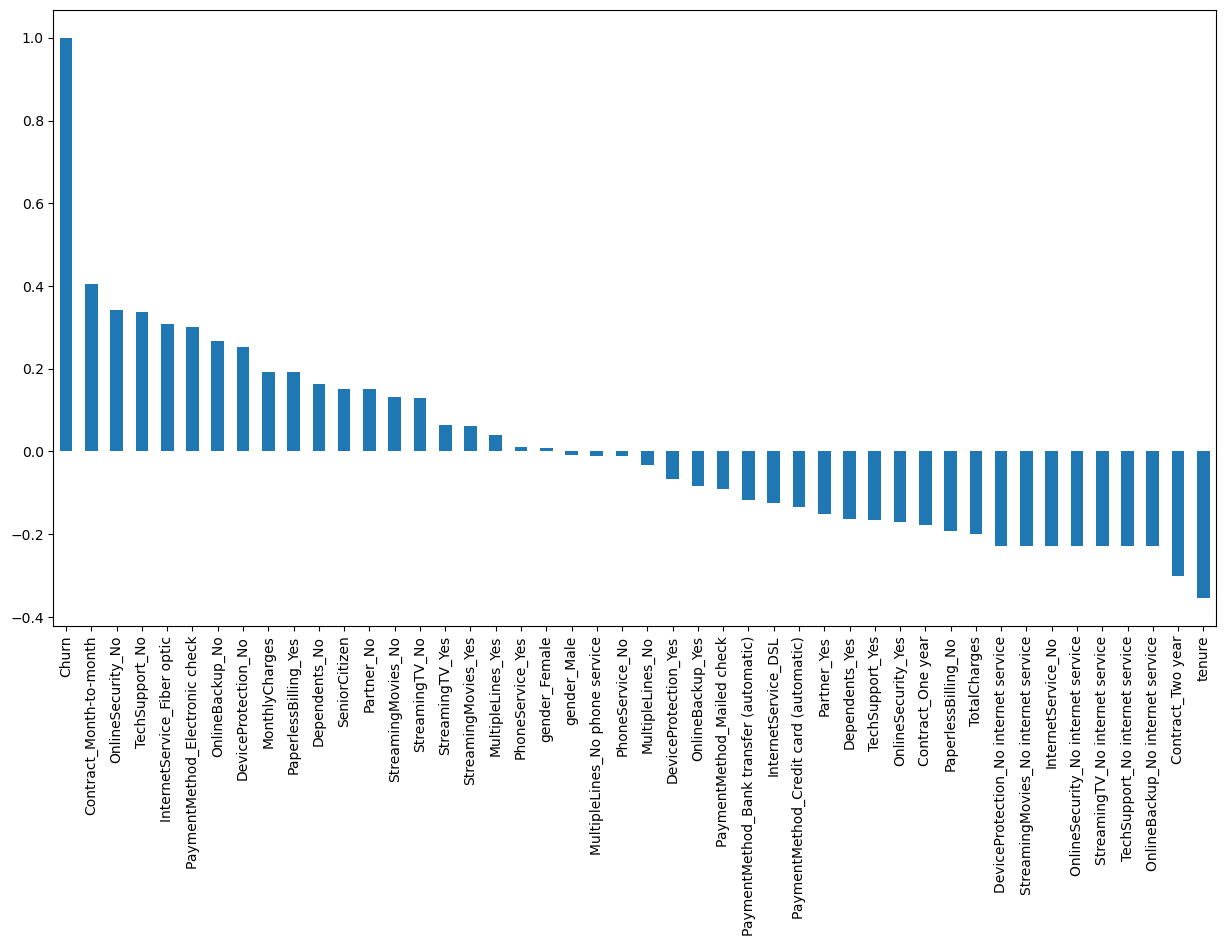

In [19]:
#Get Correlation of "Churn" with other variables:
plt.figure(figsize=(15,8))
df_dummies.corr()['Churn'].sort_values(ascending = False).plot(kind='bar')

## Data Exploration

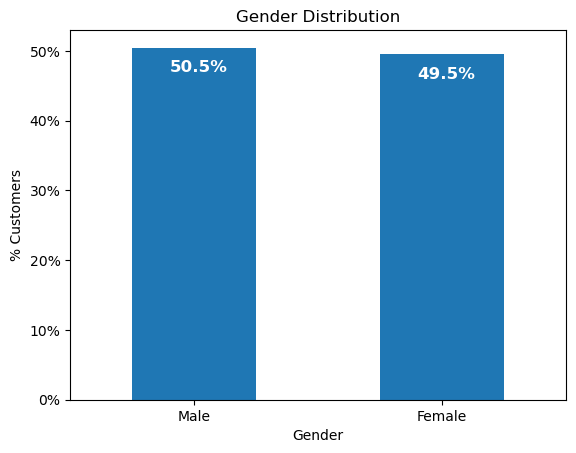

In [28]:
ors = ['#4D3425','#E4512B']
ax = (telecom_cust['gender'].value_counts()*100.0 /len(telecom_cust)).plot(kind='bar', stacked = True, rot = 0,)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('% Customers')
ax.set_xlabel('Gender')
ax.set_ylabel('% Customers')
ax.set_title('Gender Distribution')
# create a list to collect the plt.patches data
totals = []
# find the values and append to list
for i in ax.patches:
    totals.append(i.get_width())
# set individual bar lables using above list
total = sum(totals)
for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_x()+.15, i.get_height()-3.5, str(round((i.get_height()/total), 1))+'%', fontsize=12, color='white', weight = 'bold')

###  1. Gender Distribution - About half of the customers in our data set are male while the other half are female

Text(0.5, 1.0, '% of Senior Citizens')

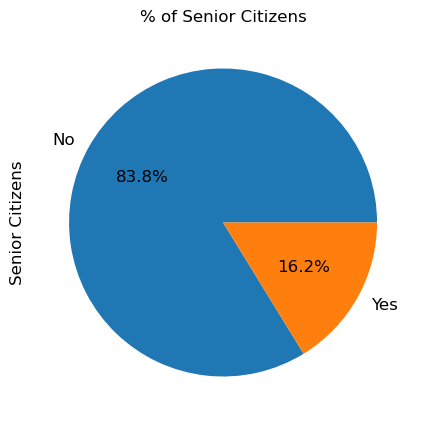

In [29]:
ax = (telecom_cust['SeniorCitizen'].value_counts()*100.0 /len(telecom_cust))\
.plot.pie(autopct='%.1f%%', labels = ['No', 'Yes'],figsize =(5,5), fontsize = 12 )                                                                           
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('Senior Citizens',fontsize = 12)
ax.set_title('% of Senior Citizens', fontsize = 12)

### % Senior Citizens - There are only 16% of the customers who are senior citizens. Thus most of our customers in the data are younger people.

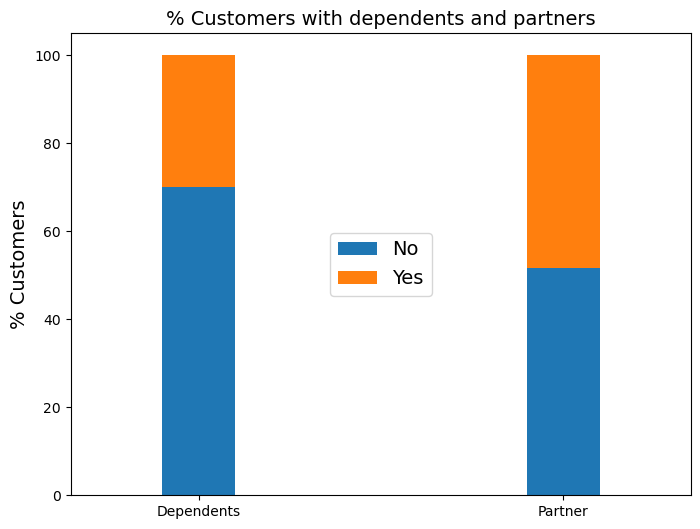

In [34]:
df2 = pd.melt(telecom_cust, id_vars=['customerID'], value_vars=['Dependents','Partner'])
df3 = df2.groupby(['variable','value']).count().unstack()
df3 = df3*100/len(telecom_cust)
colors = ['#1f77b4', '#ff7f0e']
ax = df3.loc[:,'customerID'].plot.bar(stacked=True, color=colors,figsize=(8,6),rot = 0,width = 0.2)
ax.set_ylabel('% Customers',size = 14)
ax.set_xlabel('')
ax.set_title('% Customers with dependents and partners',size = 14)
ax.legend(loc = 'center',prop={'size':14})

### Partner and dependent status - About 50% of the customers have a partner, while only 30% of the total customers have dependents.

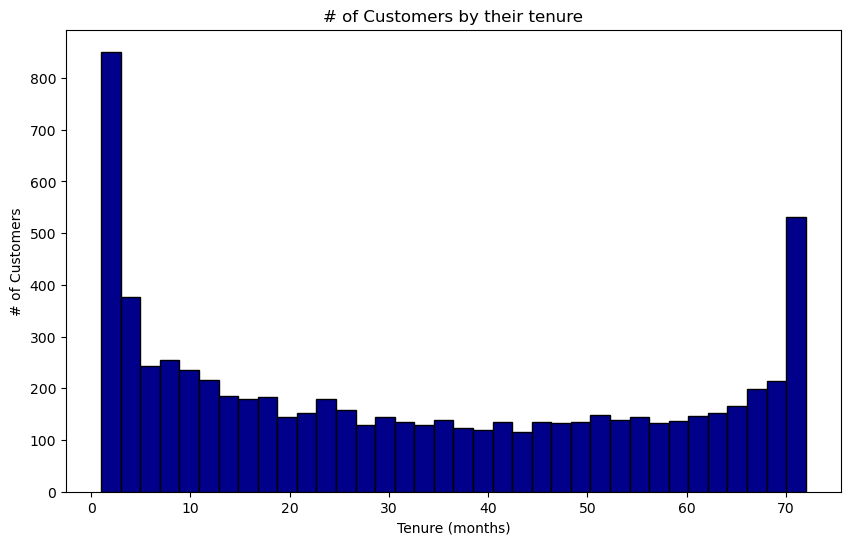

In [36]:
plt.figure(figsize=(10, 6))
plt.hist(telecom_cust['tenure'], bins=int(180/5), color='darkblue', edgecolor='black')

# Set labels and title
plt.ylabel('# of Customers')
plt.xlabel('Tenure (months)')
plt.title('# of Customers by their tenure')

# Display the plot
plt.show()

### Based on the contract they are into it could be more/less easier for the customers to stay/leave the telecom company.

Text(0.5, 1.0, '# of Customers by Contract Type')

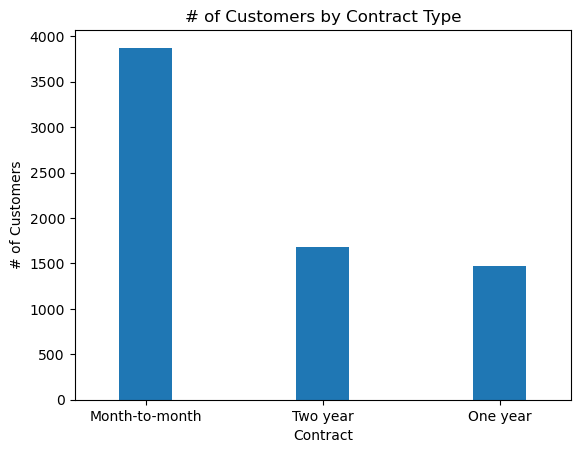

In [37]:
ax = telecom_cust['Contract'].value_counts().plot(kind = 'bar',rot = 0, width = 0.3)
ax.set_ylabel('# of Customers')
ax.set_title('# of Customers by Contract Type')

### Most of the customers are in the month to month contract. While there are equal number of customers in the 1 year and 2 year contracts.

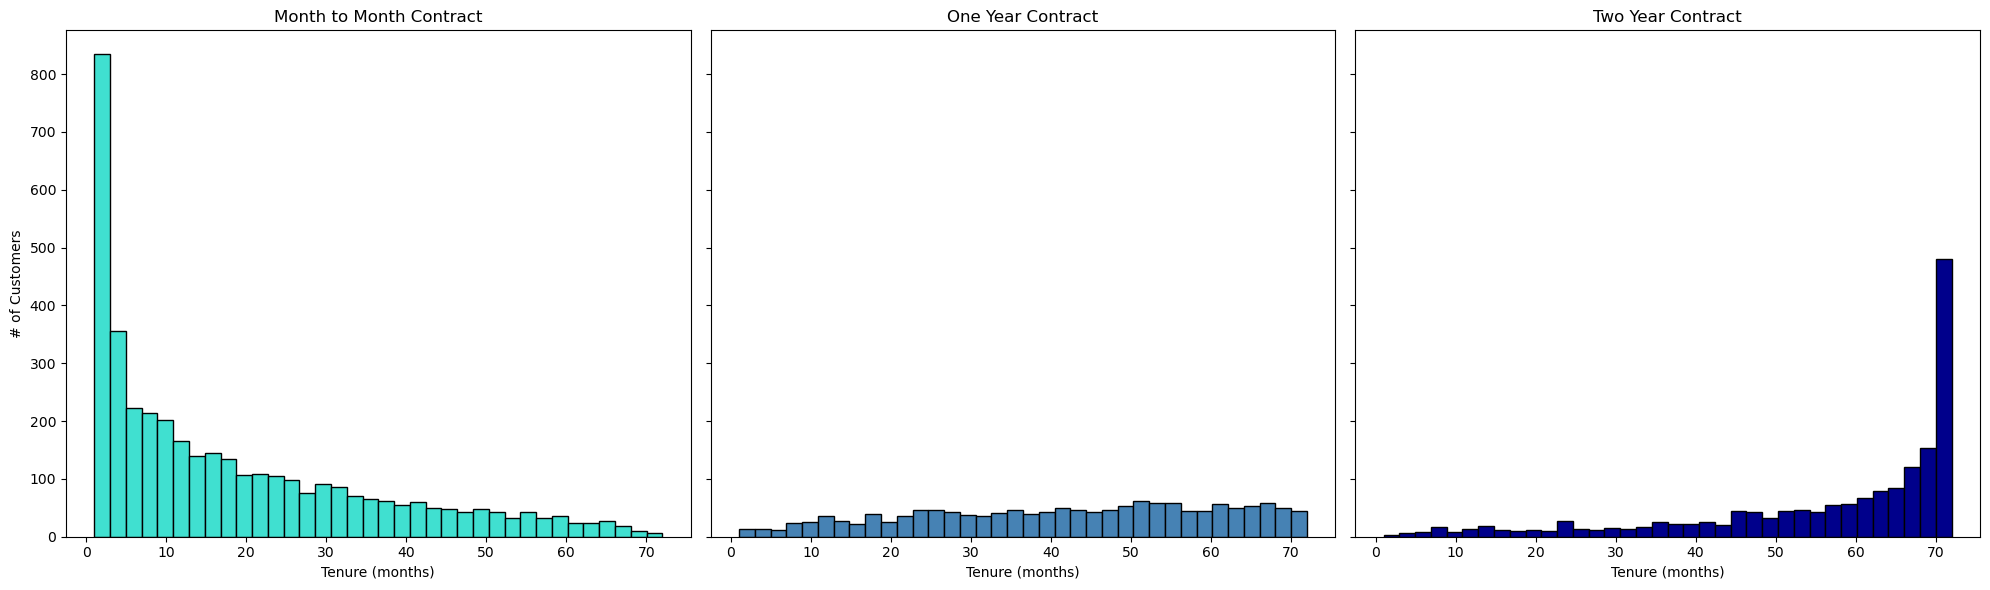

In [40]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, sharey=True, figsize=(20, 6))

# Plot histogram for Month-to-month contract
ax1.hist(telecom_cust[telecom_cust['Contract'] == 'Month-to-month']['tenure'],bins=int(180/5), color='turquoise', edgecolor='black')
ax1.set_ylabel('# of Customers')
ax1.set_xlabel('Tenure (months)')
ax1.set_title('Month to Month Contract')

# Plot histogram for One year contract
ax2.hist(telecom_cust[telecom_cust['Contract'] == 'One year']['tenure'],bins=int(180/5), color='steelblue', edgecolor='black')
ax2.set_xlabel('Tenure (months)')
ax2.set_title('One Year Contract')

# Plot histogram for Two year contract
ax3.hist(telecom_cust[telecom_cust['Contract'] == 'Two year']['tenure'],bins=int(180/5), color='darkblue', edgecolor='black')
ax3.set_xlabel('Tenure (months)')
ax3.set_title('Two Year Contract')

plt.tight_layout()

plt.show()

### Monthly contracts last for 1-2 months, while the 2 year contracts tend to last for about 70 months.

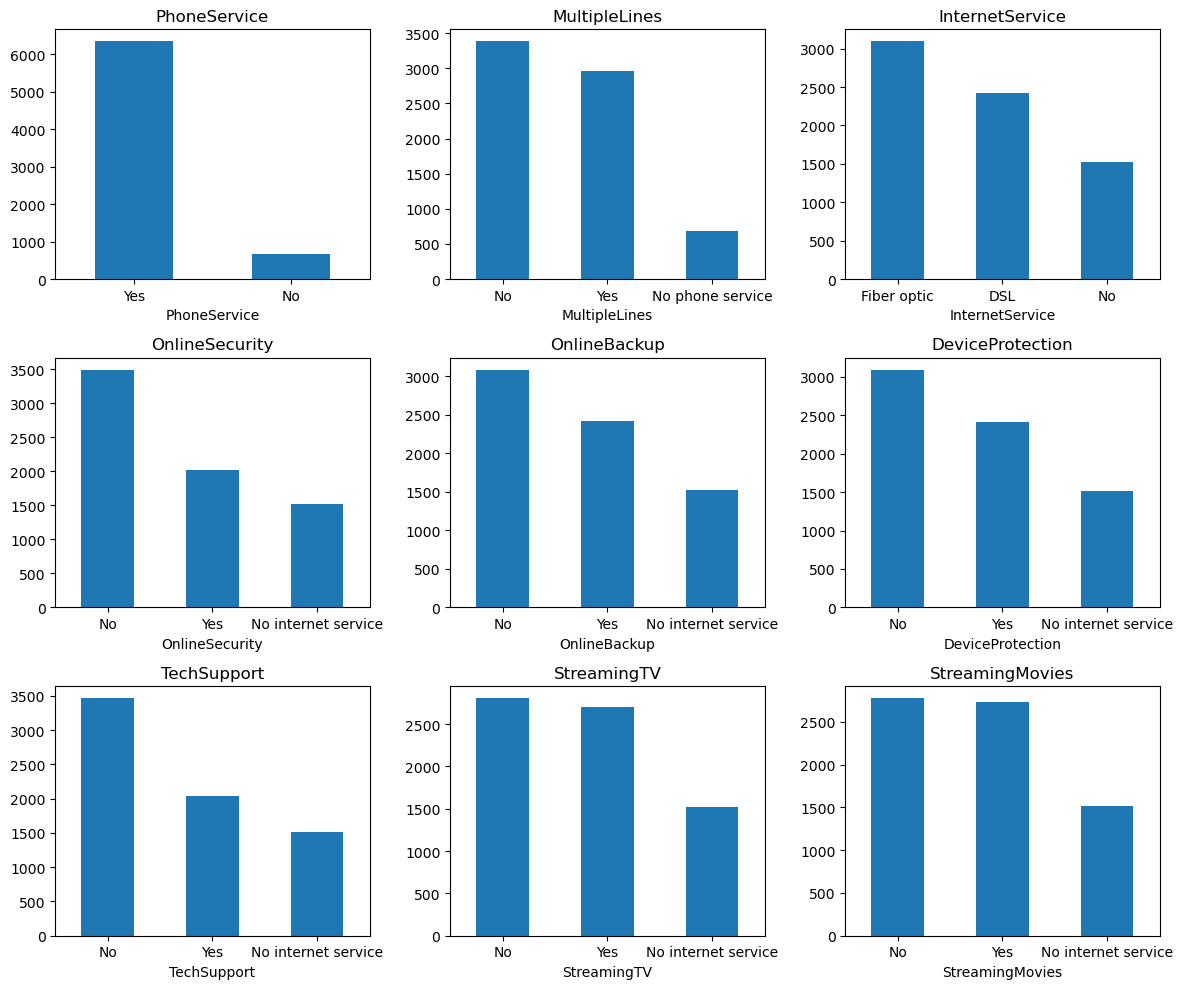

In [44]:
services = ['PhoneService','MultipleLines','InternetService','OnlineSecurity',
           'OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies']

fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(12, 10))

for i, item in enumerate(services):
    row = i // 3
    col = i % 3
    ax = telecom_cust[item].value_counts().plot(kind='bar', ax=axes[row, col], rot=0)
    ax.set_title(item)

# Adjust layout to prevent overlap
plt.tight_layout()

plt.show()

## Now let's take a quick look at the relation between monthly and total charges

<Axes: xlabel='MonthlyCharges', ylabel='TotalCharges'>

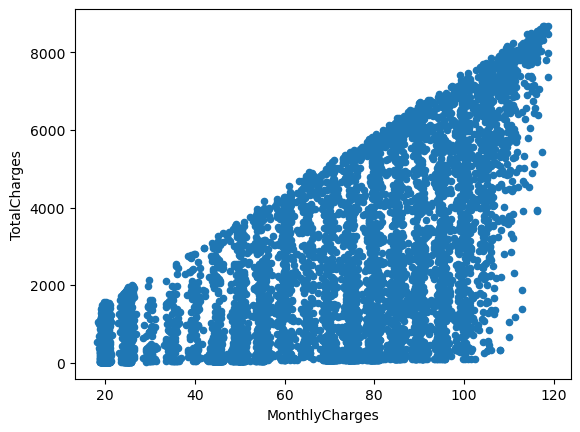

In [45]:
telecom_cust[['MonthlyCharges', 'TotalCharges']].plot.scatter(x = 'MonthlyCharges', y='TotalCharges')

## Finally, let's take a look at out predictor variable (Churn) and understand its interaction with other important variables as was found out in the correlation plot.

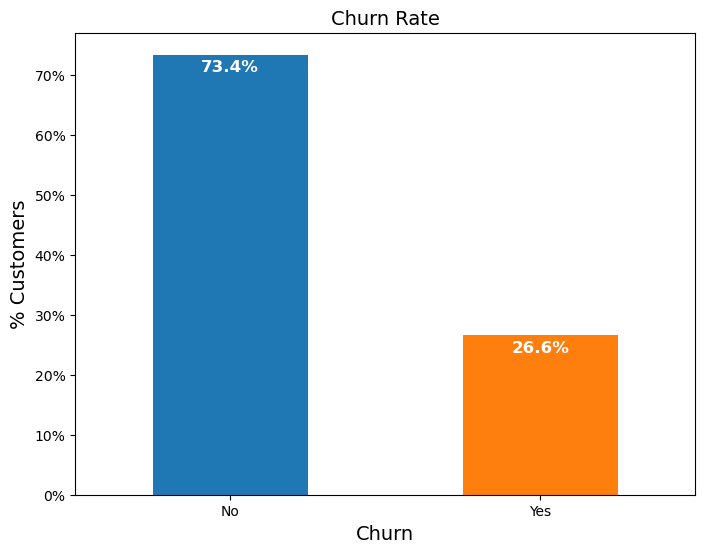

In [48]:
colors = ['#1f77b4', '#ff7f0e']  # Blue and orange

# Plot the Churn rate
ax = (telecom_cust['Churn'].value_counts() * 100.0 / len(telecom_cust)).plot(
    kind='bar', stacked=True, rot=0, color=colors, figsize=(8, 6)
)

# Format y-axis as percentage
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('% Customers', size=14)
ax.set_xlabel('Churn', size=14)
ax.set_title('Churn Rate', size=14)

# Annotate each bar with the percentage value using ax.text
for p in ax.patches:
    ax.text(p.get_x() + p.get_width() / 2., p.get_height() - 2,
            f'{p.get_height():.1f}%',
            ha='center', va='center', fontsize=12, color='white', weight='bold')

# Display the plot
plt.show()

### i.) Churn vs Tenure: As we can see form the below plot, the customers who do not churn, they tend to stay for a longer tenure with the telecom company.

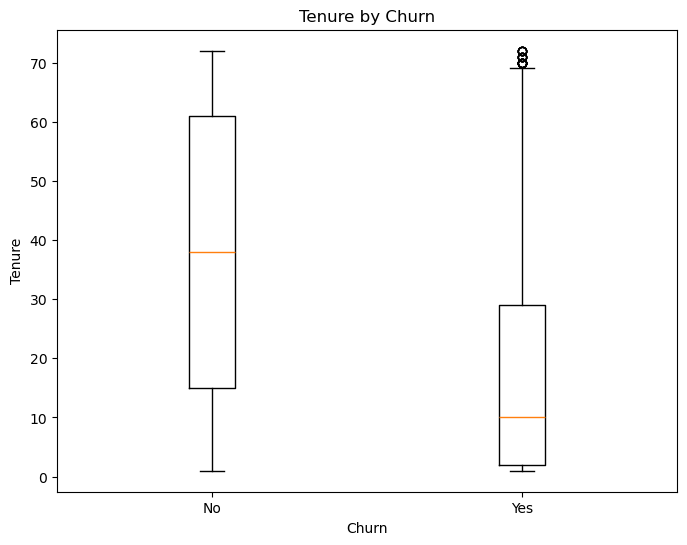

In [51]:
data = [telecom_cust[telecom_cust['Churn'] == 'No']['tenure'], 
        telecom_cust[telecom_cust['Churn'] == 'Yes']['tenure']]

fig, ax = plt.subplots(figsize=(8, 6))
ax.boxplot(data, labels=['No', 'Yes'])

ax.set_xlabel('Churn')
ax.set_ylabel('Tenure')
ax.set_title('Tenure by Churn')

plt.show()

### ii.) Churn by Contract Type: Similar to what we saw in the correlation plot, the customers who have a month to month contract have a very high churn rate.

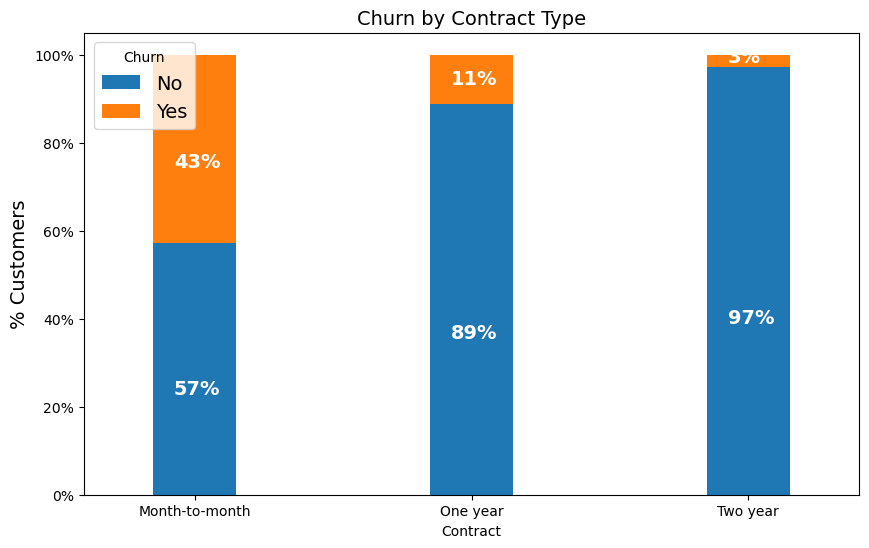

In [53]:
colors = ['#1f77b4','#ff7f0e']
contract_churn = telecom_cust.groupby(['Contract','Churn']).size().unstack()

ax = (contract_churn.T*100.0 / contract_churn.T.sum()).T.plot(kind='bar',width = 0.3,stacked = True,rot = 0,figsize = (10,6), color = colors)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.legend(loc='best',prop={'size':14},title = 'Churn')
ax.set_ylabel('% Customers',size = 14)
ax.set_title('Churn by Contract Type',size = 14)
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.0f}%'.format(height), (p.get_x()+.25*width, p.get_y()+.4*height), color = 'white',weight = 'bold',size = 14)

### iii.) Churn by Seniority: Senior Citizens have almost double the churn rate than younger population.

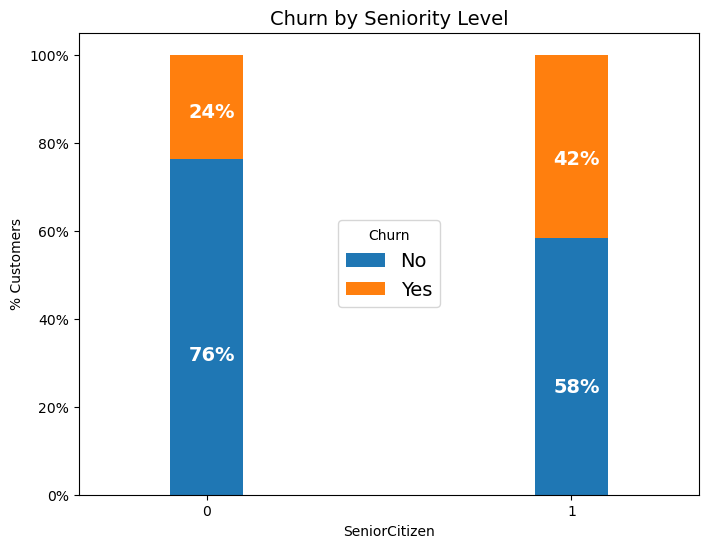

In [55]:
colors = ['#1f77b4','#ff7f0e']
seniority_churn = telecom_cust.groupby(['SeniorCitizen','Churn']).size().unstack()

ax = (seniority_churn.T*100.0 / seniority_churn.T.sum()).T.plot(kind='bar',width = 0.2,stacked = True,rot = 0, figsize = (8,6), color = colors)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.legend(loc='center',prop={'size':14},title = 'Churn')
ax.set_ylabel('% Customers')
ax.set_title('Churn by Seniority Level',size = 14)

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.0f}%'.format(height), (p.get_x()+.25*width, p.get_y()+.4*height), color = 'white', weight = 'bold',size =14)

### iv.) Churn by Monthly Charges: Higher % of customers churn when the monthly charges are high.


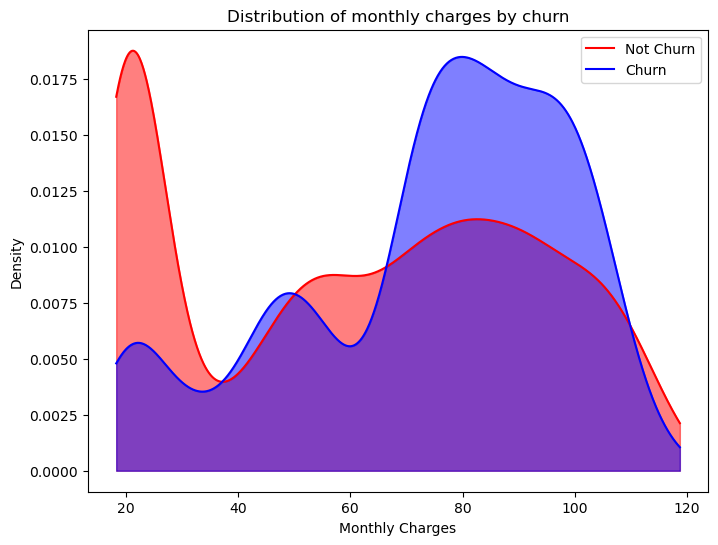

In [57]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import gaussian_kde

monthly_charges_no = telecom_cust.MonthlyCharges[telecom_cust["Churn"] == 'No']
monthly_charges_yes = telecom_cust.MonthlyCharges[telecom_cust["Churn"] == 'Yes']

# Generate KDE for each group
kde_no = gaussian_kde(monthly_charges_no)
kde_yes = gaussian_kde(monthly_charges_yes)

# Define the range for the plot
x = np.linspace(min(telecom_cust.MonthlyCharges), max(telecom_cust.MonthlyCharges), 1000)

# Plot the KDE
fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(x, kde_no(x), color='red', label='Not Churn')
ax.fill_between(x, kde_no(x), color='red', alpha=0.5)
ax.plot(x, kde_yes(x), color='blue', label='Churn')
ax.fill_between(x, kde_yes(x), color='blue', alpha=0.5)

# Set labels and title
ax.set_ylabel('Density')
ax.set_xlabel('Monthly Charges')
ax.set_title('Distribution of monthly charges by churn')
ax.legend(loc='upper right')

# Display the plot
plt.show()


### v.) Churn by Total Charges: It seems that there is higer churn when the total charges are lower.

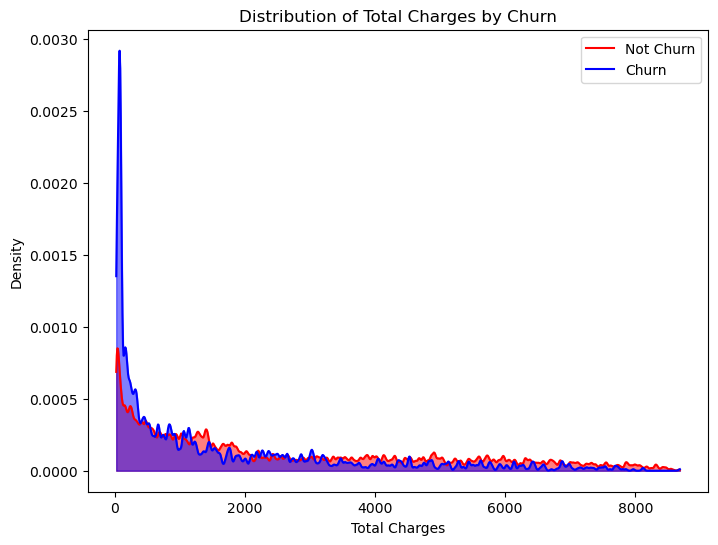

In [59]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.neighbors import KernelDensity
# Prepare the data
total_charges_no = telecom_cust.TotalCharges[telecom_cust["Churn"] == 'No'].dropna()
total_charges_yes = telecom_cust.TotalCharges[telecom_cust["Churn"] == 'Yes'].dropna()

# Function to calculate KDE
def kde_sklearn(x, x_grid, bandwidth=1.0):
    kde = KernelDensity(bandwidth=bandwidth, kernel='gaussian')
    kde.fit(x[:, None])
    log_pdf = kde.score_samples(x_grid[:, None])
    return np.exp(log_pdf)

# Define the range for the plot
x_grid = np.linspace(telecom_cust.TotalCharges.min(), telecom_cust.TotalCharges.max(), 1000)

# Calculate KDE
kde_no = kde_sklearn(total_charges_no.values, x_grid, bandwidth=20.0)
kde_yes = kde_sklearn(total_charges_yes.values, x_grid, bandwidth=20.0)

# Plot the KDE
fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(x_grid, kde_no, color='red', label='Not Churn')
ax.fill_between(x_grid, kde_no, color='red', alpha=0.5)
ax.plot(x_grid, kde_yes, color='blue', label='Churn')
ax.fill_between(x_grid, kde_yes, color='blue', alpha=0.5)

# Set labels and title
ax.set_ylabel('Density')
ax.set_xlabel('Total Charges')
ax.set_title('Distribution of Total Charges by Churn')
ax.legend(loc='upper right')

# Display the plot
plt.show()


## After going through the above EDA we will develop some predictive models and compare them.

In [60]:
# We will use the data frame where we had created dummy variables
y = df_dummies['Churn'].values
X = df_dummies.drop(columns = ['Churn'])

# Scaling all the variables to a range of 0 to 1
from sklearn.preprocessing import MinMaxScaler
features = X.columns.values
scaler = MinMaxScaler(feature_range = (0,1))
scaler.fit(X)
X = pd.DataFrame(scaler.transform(X))
X.columns = features

In [61]:
# Create Train & Test Data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [62]:
# Running logistic regression model
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
result = model.fit(X_train, y_train)

In [63]:
from sklearn import metrics
prediction_test = model.predict(X_test)
# Print the prediction accuracy
print (metrics.accuracy_score(y_test, prediction_test))

0.8075829383886256


#### Here our accuracy came out to be 80.7% by using 1.Logistic Regression

Axes(0.125,0.11;0.775x0.77)


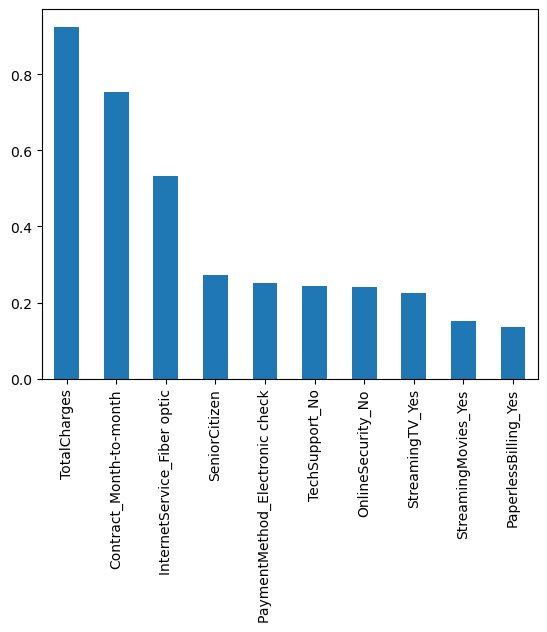

In [64]:
# To get the weights of all the variables
weights = pd.Series(model.coef_[0],
                 index=X.columns.values)
print (weights.sort_values(ascending = False)[:10].plot(kind='bar'))

Axes(0.125,0.11;0.775x0.77)


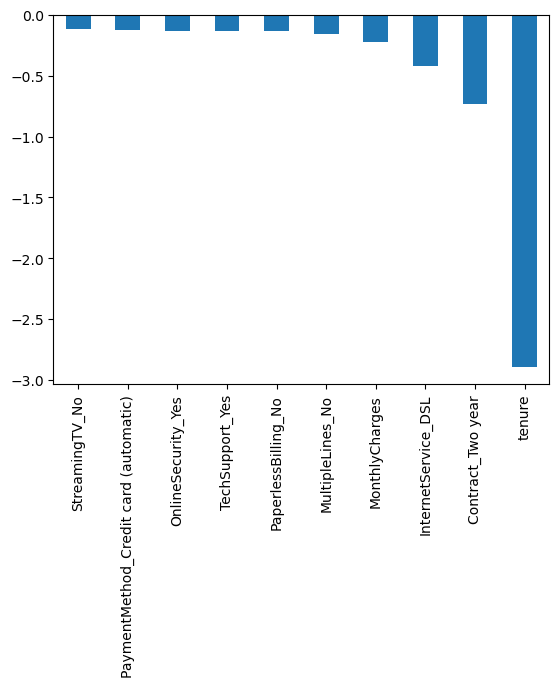

In [65]:
print(weights.sort_values(ascending = False)[-10:].plot(kind='bar'))

In [66]:
# Now we will use Random Forest 

In [68]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

# Assuming X and y are already defined
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

# Initialize the RandomForestClassifier with updated max_features parameter
model_rf = RandomForestClassifier(n_estimators=1000, oob_score=True, n_jobs=-1,
                                  random_state=50, max_features="sqrt", max_leaf_nodes=30)

# Fit the model
model_rf.fit(X_train, y_train)

# Make predictions
prediction_test = model_rf.predict(X_test)

# Print the accuracy score
print(metrics.accuracy_score(y_test, prediction_test))

0.8088130774697939


### Here the Accuracy changes to 80.88%

<Axes: >

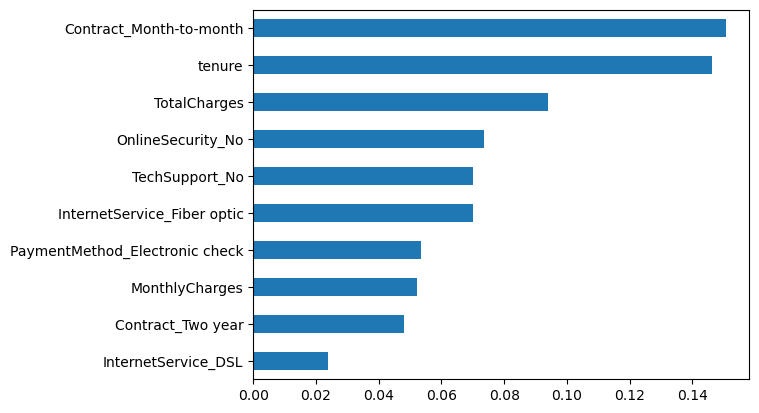

In [69]:
importances = model_rf.feature_importances_
weights = pd.Series(importances,
                 index=X.columns.values)
weights.sort_values()[-10:].plot(kind = 'barh')

In [76]:
from sklearn.ensemble import AdaBoostClassifier
model = AdaBoostClassifier()
# n_estimators = 50 (default value) 
# base_estimator = DecisionTreeClassifier (default value)
model.fit(X_train,y_train)
preds = model.predict(X_test)
metrics.accuracy_score(y_test, preds)

0.8123667377398721

In [77]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

# Assuming X and y are already defined
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

# Initialize the LogisticRegression
model = LogisticRegression(max_iter=1000, random_state=50)

# Fit the model
model.fit(X_train, y_train)

# Make predictions
preds = model.predict(X_test)

# Print the accuracy score
print(metrics.accuracy_score(y_test, preds))

0.814498933901919


#### Final accuracy of 81.4% is obtained